In [1]:
import pandas as pd
df = pd.read_csv("iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
df.shape

(150, 5)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
data = df.drop_duplicates(subset = "species",)
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
50,7.0,3.2,4.7,1.4,Iris-versicolor
100,6.3,3.3,6.0,2.5,Iris-virginica


We can see that there are only three unique species. Let’s see if the dataset is balanced or not i.e. all the species contain equal amounts of rows or not. We will use the Series.value_counts() function. This function returns a Series containing counts of unique values. 

In [8]:
df.value_counts("species")

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

**DATA VISUALIZATION**

<function matplotlib.pyplot.show(close=None, block=None)>

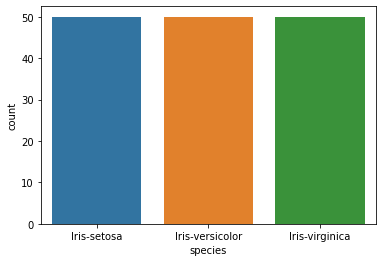

In [10]:
#importing packages
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='species',data=df)
plt.show

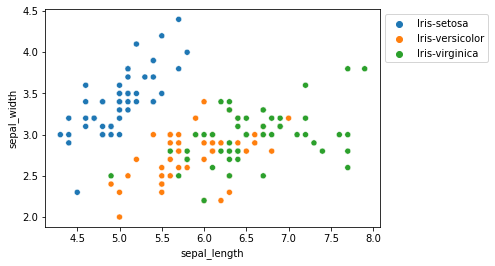

In [13]:
#1.) Comparing sepal length and sepal width
sns.scatterplot(x='sepal_length', y = 'sepal_width', hue='species', data = df,)

#placing legend outside the figure
plt.legend(bbox_to_anchor=(1,1),loc=2)

plt.show()

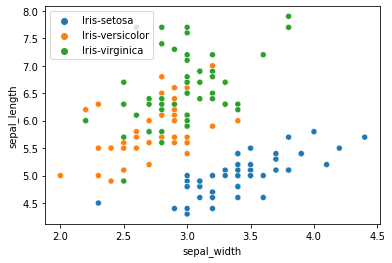

In [37]:
#1b>) Comparing sepal width versus length
sns.scatterplot(x='sepal_width', y='sepal_length',hue='species', data = df,)

plt.legend(bbox_to_anchor=(0,1),loc=2)

plt.show()

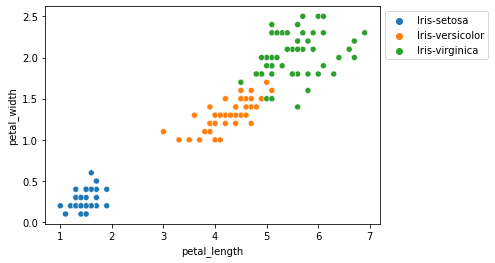

In [38]:
#2.) Comparing petal length and petal width

sns.scatterplot(x='petal_length', y='petal_width', hue='species',data = df,)

plt.legend(bbox_to_anchor=(1,1),loc=2)
plt.show()

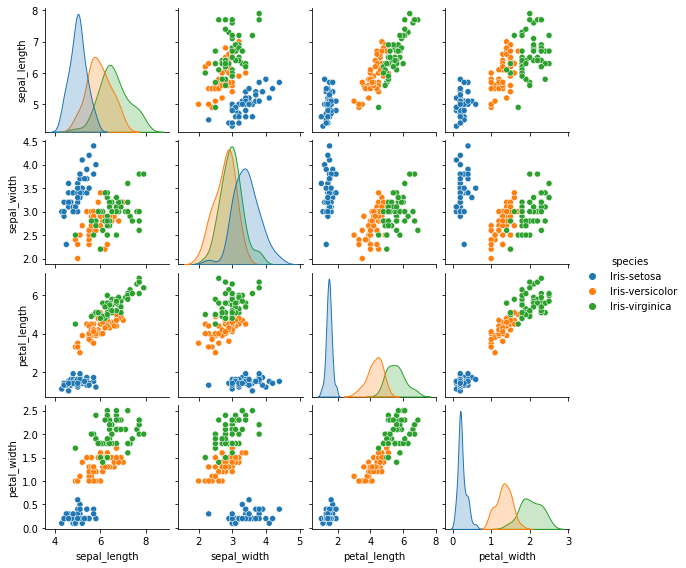

In [39]:
sns.pairplot(df,hue='species',height=2)

(array([48.,  2., 15., 37., 25., 23.]),
 array([0.1, 0.5, 0.9, 1.3, 1.7, 2.1, 2.5]),
 <BarContainer object of 6 artists>)

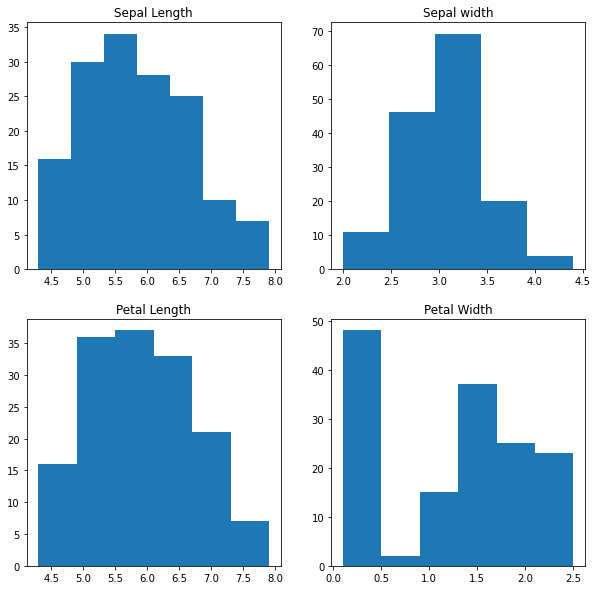

In [42]:
#3.)Histograms
fig, axes = plt.subplots(2,2,figsize=(10,10))

axes[0,0].set_title("Sepal Length")
axes[0,0].hist(df['sepal_length'], bins=7)

axes[0,1].set_title("Sepal width")
axes[0,1].hist(df['sepal_width'], bins=5)

axes[1,0].set_title("Petal Length")
axes[1,0].hist(df['sepal_length'], bins=6)

axes[1,1].set_title("Petal Width")
axes[1,1].hist(df['petal_width'], bins=6)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

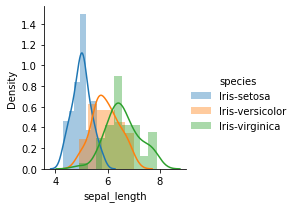

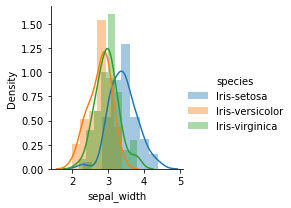

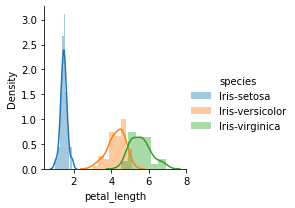

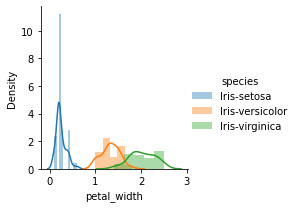

In [45]:
#Histogram with Distplot PLOT
plot = sns.FacetGrid(df, hue='species')
plot.map(sns.distplot,'sepal_length').add_legend()

plot = sns.FacetGrid(df, hue='species')
plot.map(sns.distplot,"sepal_width").add_legend()

plot = sns.FacetGrid(df,hue='species')
plot.map(sns.distplot,'petal_length').add_legend()

plot = sns.FacetGrid(df, hue='species')
plot.map(sns.distplot,'petal_width').add_legend()

plt.show()

In [46]:
data.corr(method='pearson')

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.999226,0.795795,0.643817
sepal_width,-0.999226,1.000000,-0.818999,-0.673417
petal_length,0.795795,-0.818999,1.000000,0.975713
petal_width,0.643817,-0.673417,0.975713,1.000000


**Heatmaps**

The heatmap is a data visualization technique that is used to analyze the dataset as colors in two dimensions. Basically, it shows a correlation between all numerical variables in the dataset. In simpler terms, we can plot the above-found correlation using the heatmaps.

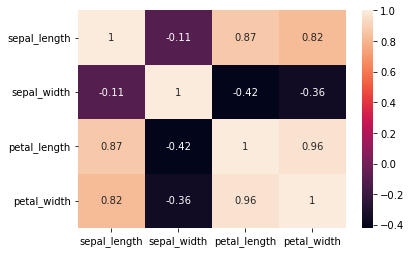

In [48]:
sns.heatmap(df.corr(method='pearson'), annot = True);

plt.show()

**Box Plots**

We can use boxplots to see how the categorical value os distributed with other numerical values.

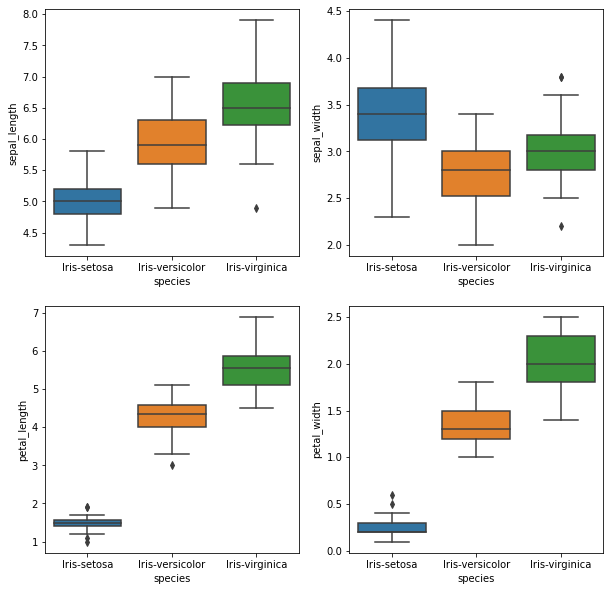

In [53]:
def graph(y):
    sns.boxplot(x='species', y=y,data=df)
    
plt.figure(figsize=(10,10))

#adding the subplot at the specified grid position
plt.subplot(221)
graph('sepal_length')

plt.subplot(222)
graph('sepal_width')

plt.subplot(223)
graph('petal_length')

plt.subplot(224)
graph('petal_width')

plt.show()

**HANDLING OUTLIERS**

<AxesSubplot:xlabel='sepal_width'>

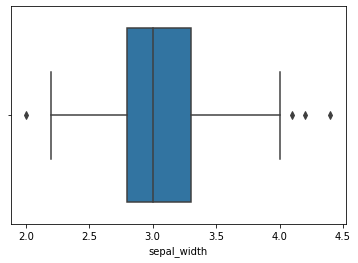

In [54]:
sns.boxplot(x='sepal_width', data = df)

Old shape:  (150, 5)
New shape:  (146, 5)


<AxesSubplot:xlabel='sepal_width'>

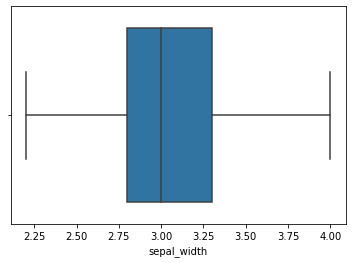

In [57]:
#removing outliers
import sklearn
from sklearn.datasets import load_boston
import pandas as pd
import seaborn as sns
import numpy as np

df = pd.read_csv('iris.csv')

#IQR

Q1 = np.percentile(df['sepal_width'],25,
                  interpolation = 'midpoint')

Q3 = np.percentile(df['sepal_width'],75,
                  interpolation = 'midpoint')

IQR = Q3-Q1

print("Old shape: ", df.shape)

#Upper bound
upper = np.where(df['sepal_width'] >= (Q3+1.5*IQR))
#lower bound
lower = np.where(df['sepal_width'] <= (Q1-1.5*IQR))

#rEMOVING THE OUTLIERS
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

print("New shape: ", df.shape)

sns.boxplot(x='sepal_width', data = df)